In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
df=pd.read_csv("C:\\Users\\kalpana\\Downloads\\ToyotaCorolla (1).csv",encoding='latin1')

In [3]:
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [6]:
df1=df.loc[:,["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [7]:
df1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
df1.shape

(1436, 9)

# EDA

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [10]:
df1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [11]:
df1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


C:\Users\kalpana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

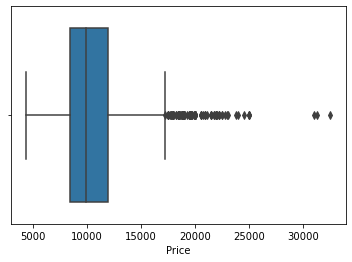

In [12]:
sns.boxplot(df1.Price)

# Outliers Treatment

# Flooring and capping

In [13]:
Q1=df1['Price'].quantile(0.25)
Q3=df1['Price'].quantile(0.75)
IQR=Q3-Q1
Whisker_width=1.5
lower_wisker=Q1-(Whisker_width*IQR)
upper_wisker=Q3+(Whisker_width*IQR)
df1['Price']=np.where(df1['Price']>upper_wisker,upper_wisker,np.where(df1['Price']<lower_wisker,lower_wisker,df1['Price']))



C:\Users\kalpana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

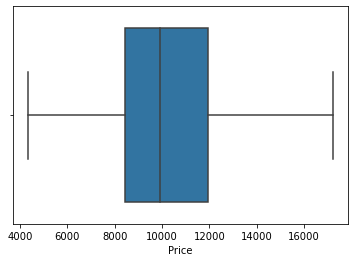

In [14]:
sns.boxplot(df1['Price'],data=df1)

In [15]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500.0,23,46986,90,2000,3,5,210,1165
1,13750.0,23,72937,90,2000,3,5,210,1165
2,13950.0,24,41711,90,2000,3,5,210,1165
3,14950.0,26,48000,90,2000,3,5,210,1165
4,13750.0,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500.0,69,20544,86,1300,3,5,69,1025
1432,10845.0,72,19000,86,1300,3,5,69,1015
1433,8500.0,71,17016,86,1300,3,5,69,1015
1434,7250.0,70,16916,86,1300,3,5,69,1015


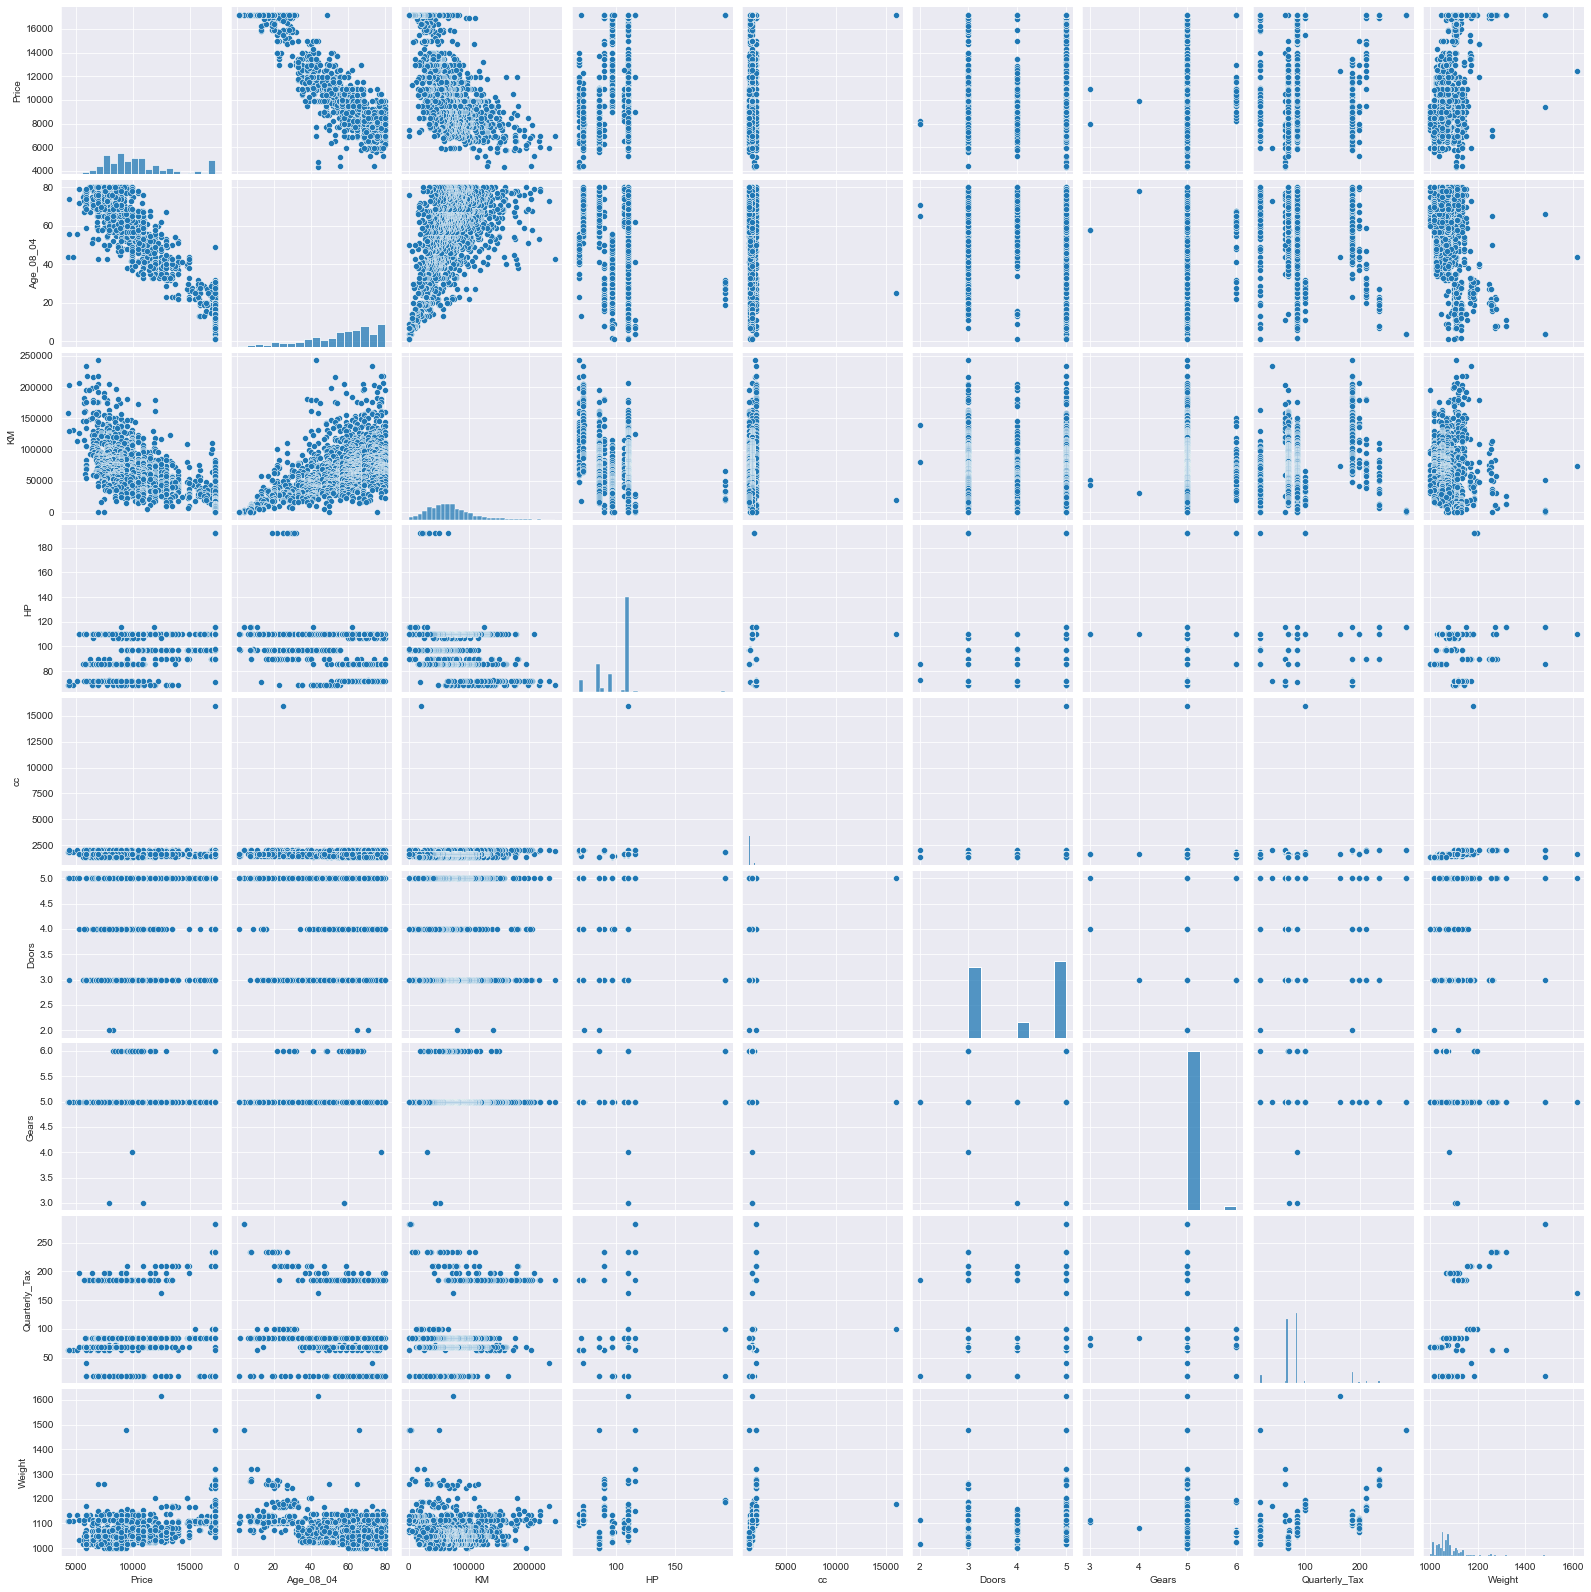

In [16]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df1)

# Normalization

In [17]:
from sklearn.preprocessing import MinMaxScaler
norm =MinMaxScaler()
df1_norm = norm.fit_transform(df1)

In [18]:
df1_norm

array([[0.71206226, 0.27848101, 0.19335471, ..., 0.66666667, 0.72348485,
        0.26829268],
       [0.73151751, 0.27848101, 0.30014938, ..., 0.66666667, 0.72348485,
        0.26829268],
       [0.74708171, 0.29113924, 0.1716468 , ..., 0.66666667, 0.72348485,
        0.26829268],
       ...,
       [0.3229572 , 0.88607595, 0.07002086, ..., 0.66666667, 0.18939394,
        0.02439024],
       [0.22568093, 0.87341772, 0.06960934, ..., 0.66666667, 0.18939394,
        0.02439024],
       [0.20233463, 0.94936709, 0.        , ..., 0.66666667, 0.        ,
        0.18536585]])

In [19]:
df2 = pd.DataFrame(df1_norm)

In [20]:
df2.columns=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]

In [21]:
df2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.712062,0.278481,0.193355,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
1,0.731518,0.278481,0.300149,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
2,0.747082,0.291139,0.171647,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
3,0.824903,0.316456,0.197528,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
4,0.731518,0.367089,0.158433,0.170732,0.047619,0.333333,0.666667,0.723485,0.276423


In [22]:
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [23]:
model1 = smf.ols('Price ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df2).fit()

In [24]:
model1.params

Intercept        0.854825
Age_08_04       -0.699848
KM              -0.314343
HP               0.176166
cc               0.023582
Doors            0.021893
Gears            0.130602
Quarterly_Tax    0.049029
Weight           0.310118
dtype: float64

In [25]:
np.round(model1.tvalues, 4),np.round(model1.pvalues, 4)

(Intercept        29.8450
 Age_08_04       -51.4635
 KM              -15.6947
 HP                7.7219
 cc                0.2706
 Doors             2.7718
 Gears             3.3569
 Quarterly_Tax     2.1541
 Weight            7.1748
 dtype: float64,
 Intercept        0.0000
 Age_08_04        0.0000
 KM               0.0000
 HP               0.0000
 cc               0.7868
 Doors            0.0056
 Gears            0.0008
 Quarterly_Tax    0.0314
 Weight           0.0000
 dtype: float64)

In [26]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1059.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:42:18   Log-Likelihood:                 1451.3
No. Observations:                1436   AIC:                            -2885.
Df Residuals:                    1427   BIC:                            -2837.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8548      0.029     29.845      0.000       0.799       0.911
Age_08_04        -0.6998      0.014    -51.463      0.000      -0.727      -0.673
KM               -0.3143      0.020    -15.695      0.000      -0.354      -0.275
HP                0.1762      0.023      7.722      0.000       0.131       0.221
cc                0.0236      0.087      0.271      0.787      -0.147       0.195
Doors             0.0219      0.008      2.772      0.006       0.006       0.037
Gears             0.1306      0.039      3.357      0.001       0.054       0.207
Quarterly_Tax     0.0490      0.023      2.154      0.031       0.004       0.094
Weight            0.3101      0.043      7.175      0.000       0.225       0.395
==============================================================================
Omnibus:                       80.943   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.526
Skew:                          -0.271   Prob(JB):                     7.87e-49
Kurtosis:                       4.846   Cond. No.                         61.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2. Residual Analysis

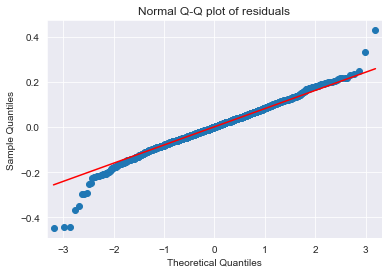

In [27]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
import statsmodels.api as sm
sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()


In [28]:
list(np.where(model1.resid < -0.20))

[array([ 109,  110,  111,  189,  191,  192,  221,  254,  292,  321,  351,
         370,  393,  402,  410,  463,  601,  654,  670,  826,  943, 1351,
        1382, 1435], dtype=int64)]

In [29]:
#Residual plot for Homoscedasticity

In [30]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()  # z = (x-mu)/sigma

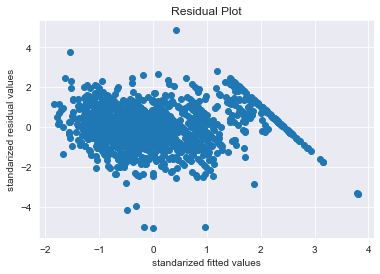

In [31]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('standarized fitted values')
plt.ylabel('standarized residual values')
plt.show()

In [32]:
#Test of errors (Residual Vs Regressor)
#Test for errors or Residuals Vs Regressors or independent variables or predictors

#using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)

#exog = x-variable & endog = y-variable


eval_env: 1


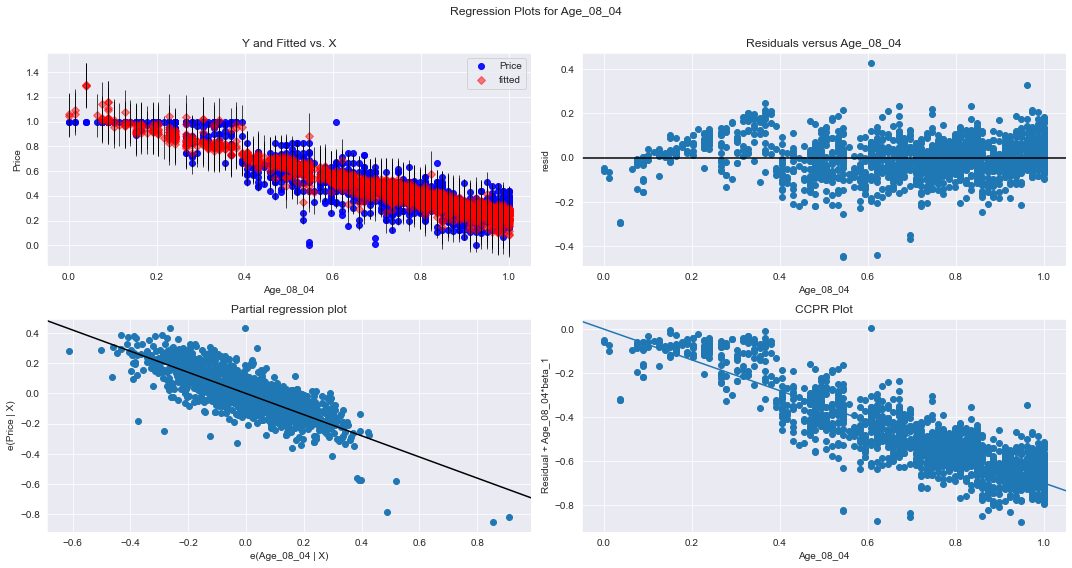

In [33]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'Age_08_04', fig=fig )
plt.show()

eval_env: 1


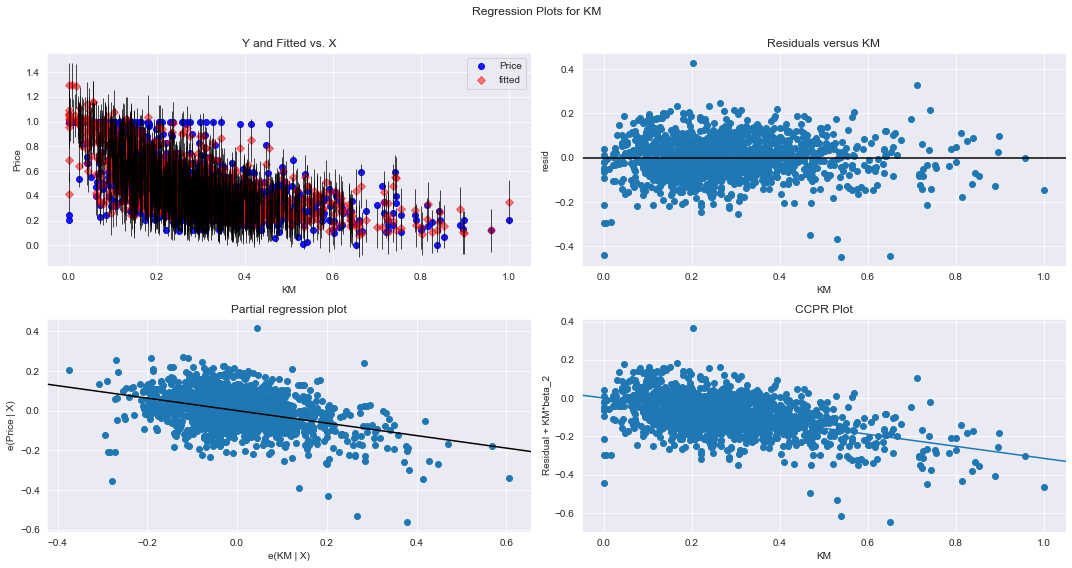

In [34]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'KM', fig=fig )
plt.show()

eval_env: 1


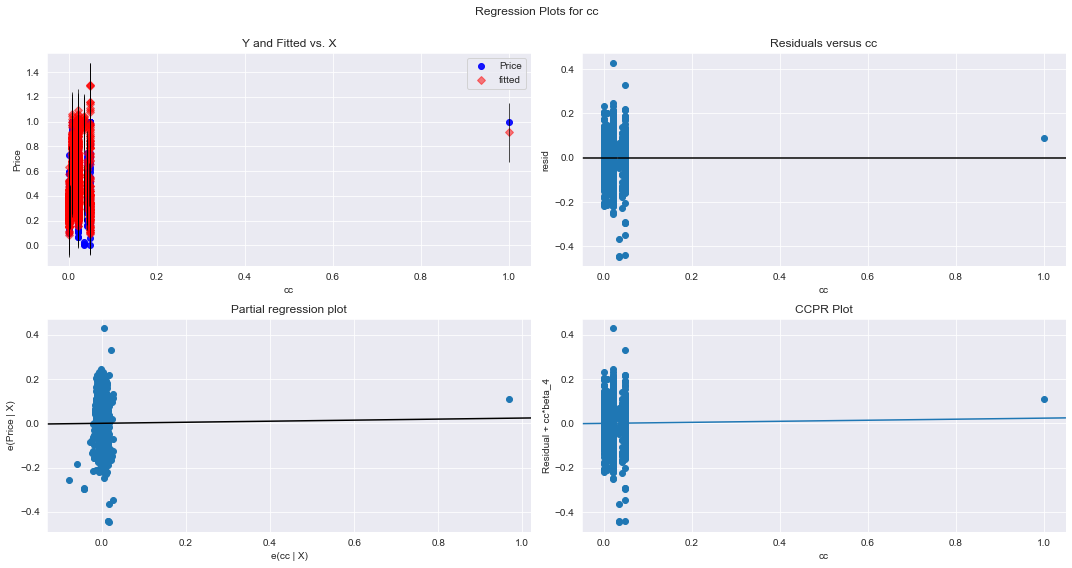

In [35]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'cc', fig=fig )
plt.show()

eval_env: 1


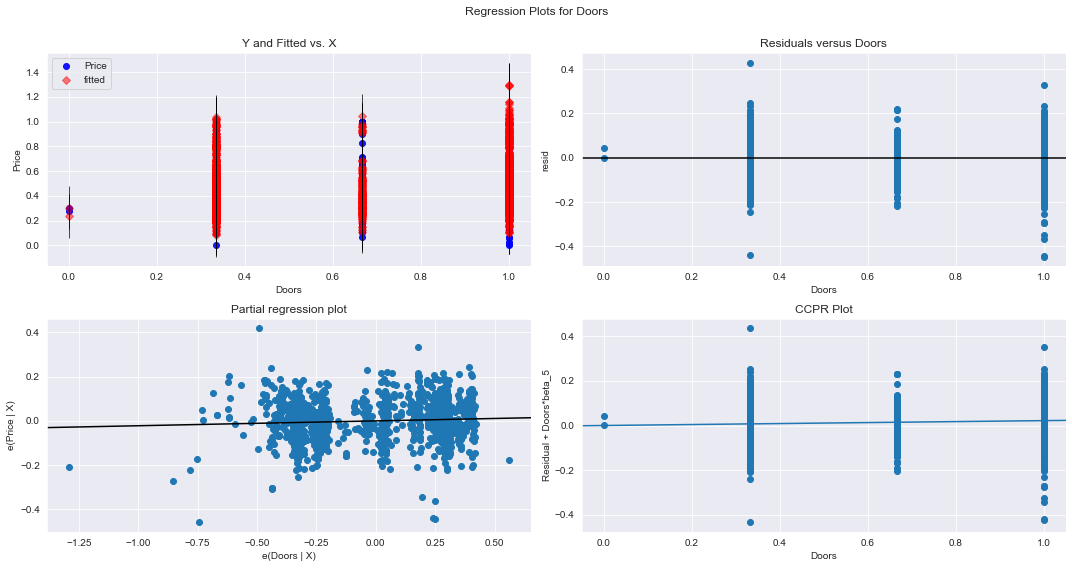

In [36]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'Doors', fig=fig )
plt.show()

eval_env: 1


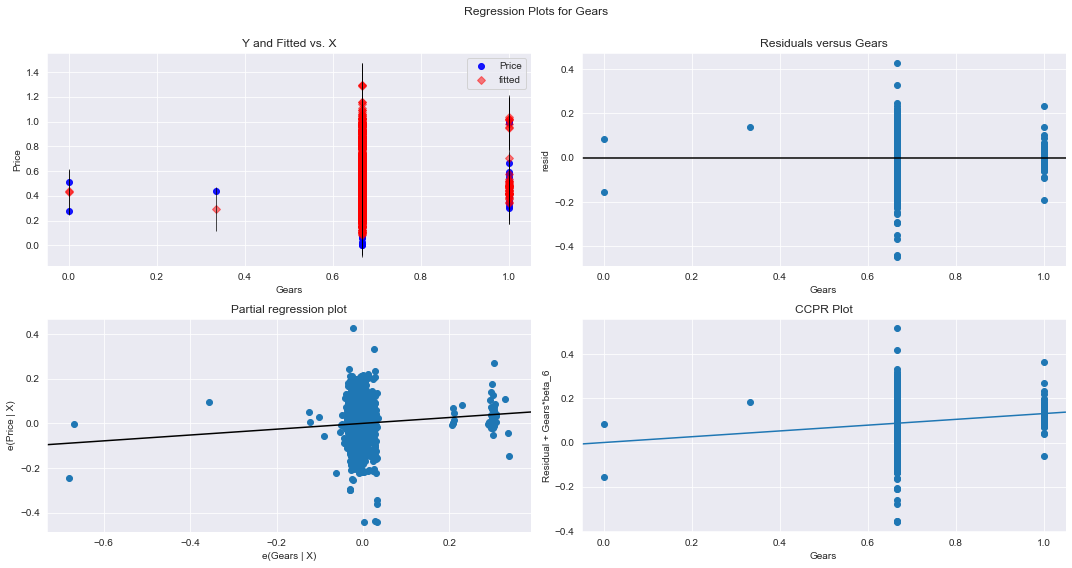

In [37]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'Gears', fig=fig )
plt.show()

eval_env: 1


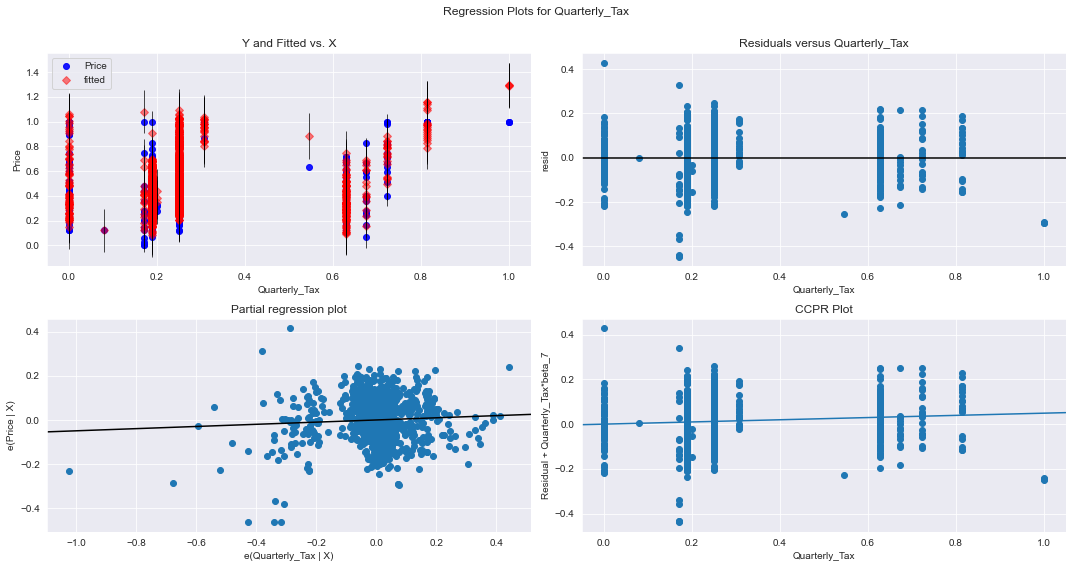

In [38]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'Quarterly_Tax', fig=fig )
plt.show()

eval_env: 1


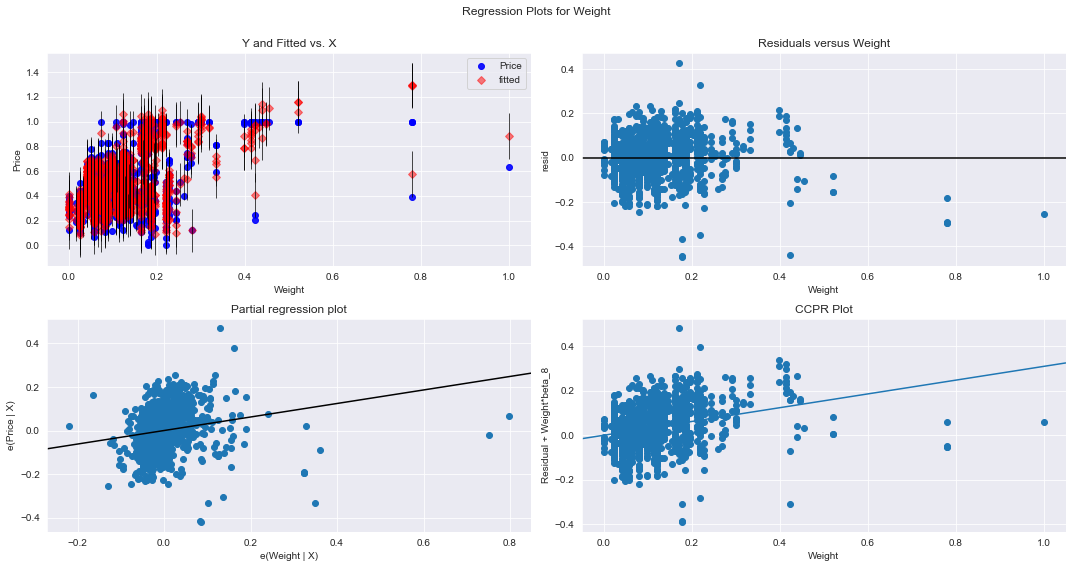

In [39]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'Weight', fig=fig )
plt.show()

# Model Deletion Diagnostics

In [40]:
#Detecting Influencers/Outliers

In [41]:
(c, _)= model1.get_influence().cooks_distance
c

array([2.62622147e-03, 8.82885690e-04, 1.37987137e-03, ...,
       5.97836919e-05, 1.58143972e-03, 9.61194538e-03])

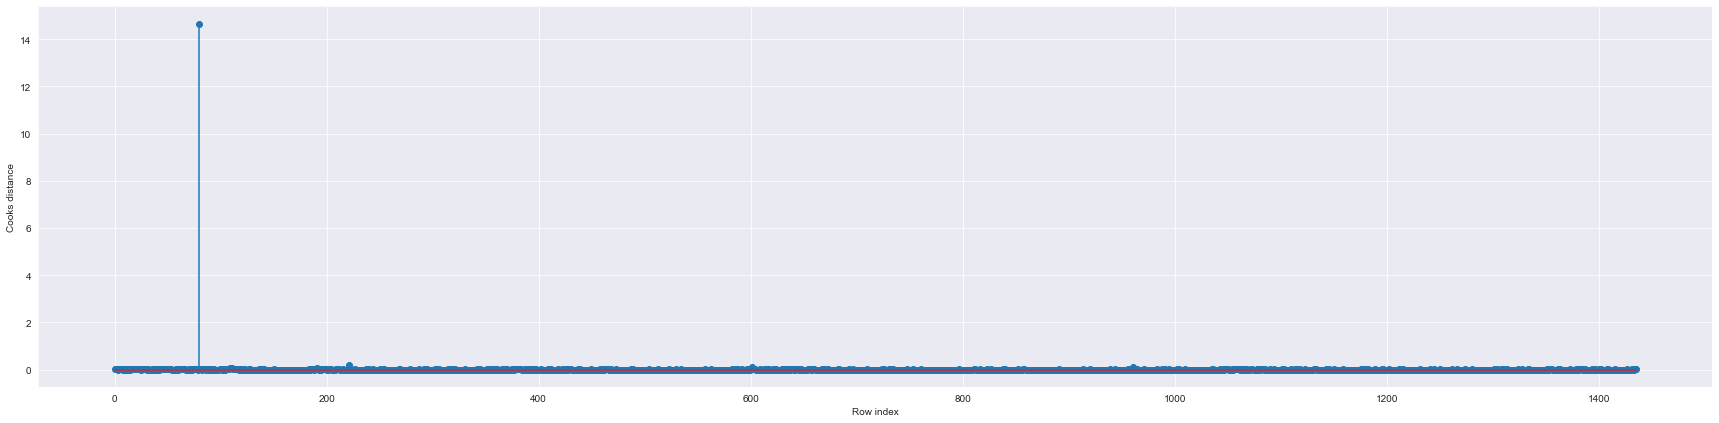

In [42]:
#Plot the influencer values using stem plot
fig = plt.subplots(figsize=(30, 7))
plt.stem(np.arange(len(df2)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [43]:
np.argmax(c), np.max(c)

(80, 14.665902867910997)

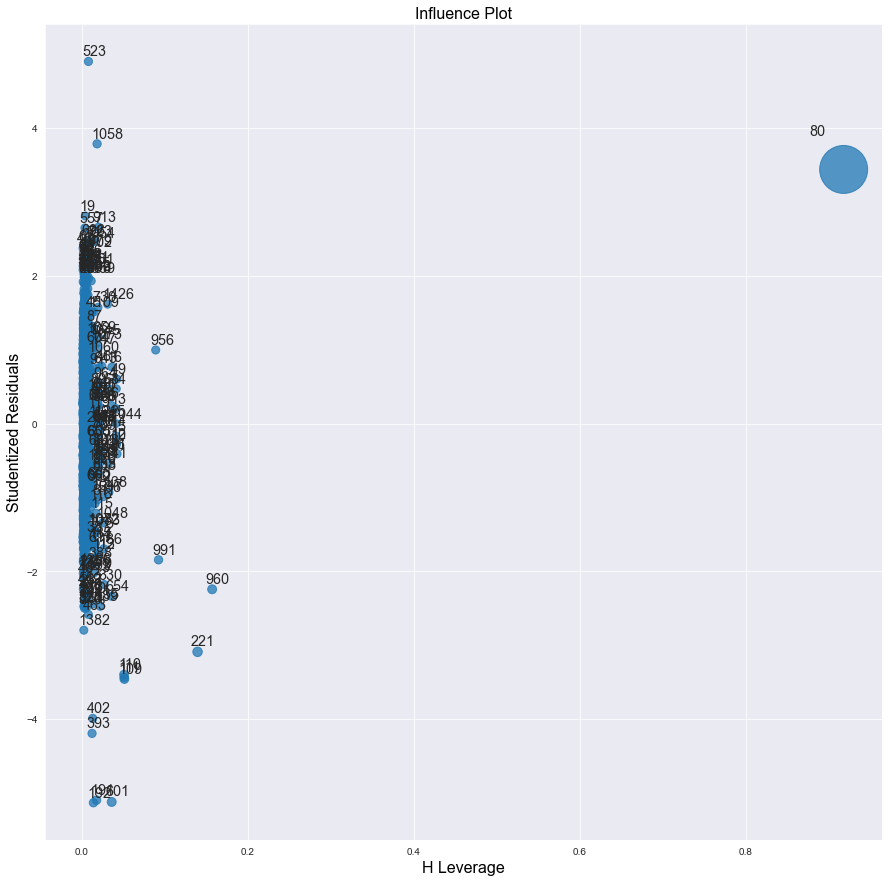

In [44]:
fig,ax = plt.subplots(figsize=(15, 15))
influence_plot(model1, ax=ax)
plt.show()

In [45]:
k = df2.shape[1] # K is no. of columns

n = df2.shape[0] # n is no. of rows
print('no. of columns=',k,"\n",'no. of rows=', n)

# leverage cutoff value
leverage_cutoff = 3*((k + 1)/n)
print('leverage cutoff =',leverage_cutoff)

no. of columns= 9 
 no. of rows= 1436
leverage cutoff = 0.020891364902506964


In [46]:
df2[df2.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,1.0,0.303797,0.082379,0.333333,1.0,1.0,0.666667,0.306818,0.292683


In [47]:
# Significant differences in value of price in 80th record
df2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.712062,0.278481,0.193355,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
1,0.731518,0.278481,0.300149,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
2,0.747082,0.291139,0.171647,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
3,0.824903,0.316456,0.197528,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
4,0.731518,0.367089,0.158433,0.170732,0.047619,0.333333,0.666667,0.723485,0.276423
...,...,...,...,...,...,...,...,...,...
1431,0.245136,0.860759,0.084539,0.138211,0.000000,0.333333,0.666667,0.189394,0.040650
1432,0.505447,0.898734,0.078186,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390
1433,0.322957,0.886076,0.070021,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390
1434,0.225681,0.873418,0.069609,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390


In [48]:
df2.shape

(1436, 9)

In [49]:
# Significant difference in value of 80th record, so it is a outlier, droping it
df2_new = df2
df2_new = df2_new.drop(df2_new.index[[80]],axis=0)

In [50]:
df2_new.shape

(1435, 9)

# Improving model

In [51]:
model2 = smf.ols('Price ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data= df2_new).fit()

In [52]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1064.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:42:34   Log-Likelihood:                 1455.7
No. Observations:                1435   AIC:                            -2893.
Df Residuals:                    1426   BIC:                            -2846.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8474      0.029     29.611      0.000       0.791       0.903
Age_08_04        -0.6972      0.014    -51.375      0.000      -0.724      -0.671
KM               -0.2940      0.021    -14.123      0.000      -0.335      -0.253
HP                0.2028      0.024      8.447      0.000       0.156       0.250
cc               -0.9748      0.303     -3.219      0.001      -1.569      -0.381
Doors             0.0197      0.008      2.498      0.013       0.004       0.035
Gears             0.1246      0.039      3.212      0.001       0.049       0.201
Quarterly_Tax     0.0870      0.025      3.451      0.001       0.038       0.137
Weight            0.3659      0.046      7.952      0.000       0.276       0.456
==============================================================================
Omnibus:                       77.440   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.182
Skew:                          -0.240   Prob(JB):                     4.19e-48
Kurtosis:                       4.849   Cond. No.                         213.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
(c1, _)= model2.get_influence().cooks_distance
c1

array([2.49253468e-03, 7.91028330e-04, 1.23846234e-03, ...,
       8.21881471e-05, 1.73109281e-03, 9.61723985e-03])

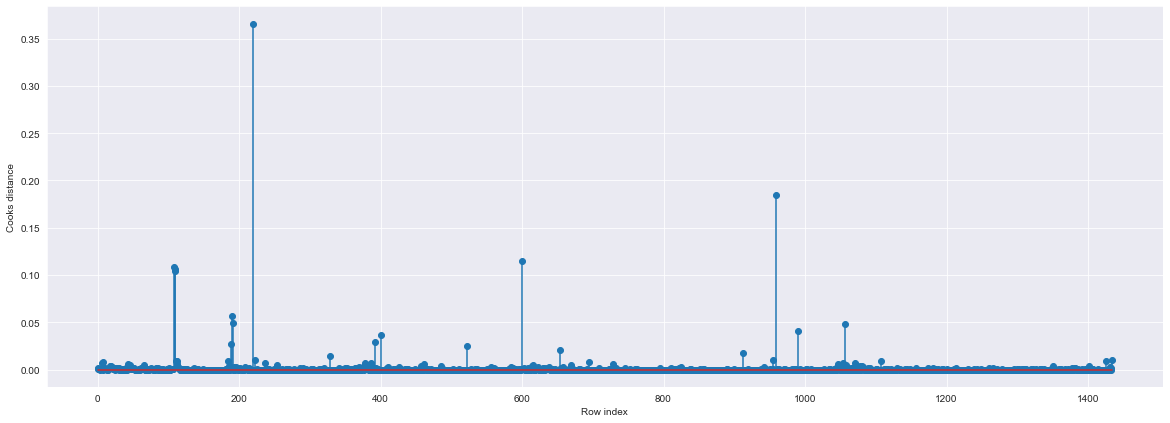

In [54]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df2_new)), np.round(c1,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [55]:
np.argmax(c1), np.max(c1)

(220, 0.3662073068559218)

In [56]:
# leverage cutoff value
leverage_cutoff = 3*((4 + 1)/49)
print('leverage cutoff =',leverage_cutoff)

leverage cutoff = 0.30612244897959184


In [57]:
df2_new[df2_new.index.isin([220])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
220,0.59144,0.531646,0.305697,0.333333,0.020408,1.0,0.666667,0.25,0.121951


In [58]:
df3_new = df2_new.drop(df2_new.index[[220]],axis=0)

In [59]:
df3_new.shape

(1434, 9)

# Rebuilding Model

In [60]:
#Rebuild model and generate R-Squared and AIC values

model3= smf.ols('Price ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data= df3_new).fit()

In [61]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1076.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:42:35   Log-Likelihood:                 1461.9
No. Observations:                1434   AIC:                            -2906.
Df Residuals:                    1425   BIC:                            -2858.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8424      0.029     29.556      0.000       0.786       0.898
Age_08_04        -0.6888      0.014    -50.398      0.000      -0.716      -0.662
KM               -0.2902      0.021    -13.996      0.000      -0.331      -0.250
HP                0.2026      0.024      8.482      0.000       0.156       0.249
cc               -1.2474      0.309     -4.034      0.000      -1.854      -0.641
Doors             0.0166      0.008      2.104      0.036       0.001       0.032
Gears             0.1215      0.039      3.146      0.002       0.046       0.197
Quarterly_Tax     0.0793      0.025      3.150      0.002       0.030       0.129
Weight            0.4476      0.050      8.900      0.000       0.349       0.546
==============================================================================
Omnibus:                       91.865   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.800
Skew:                          -0.288   Prob(JB):                     7.83e-61
Kurtosis:                       5.074   Cond. No.                         219.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
(c2, _)= model3.get_influence().cooks_distance
c2

array([2.45219668e-03, 7.70567425e-04, 1.20358977e-03, ...,
       8.31420452e-05, 1.74639233e-03, 1.07225491e-02])

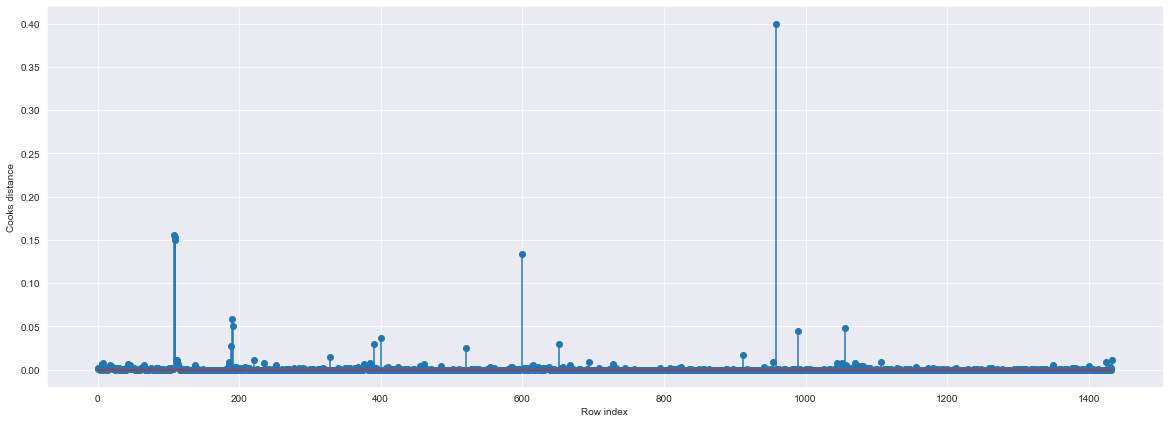

In [63]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df3_new)), np.round(c2,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [64]:
np.argmax(c2), np.max(c2)

(958, 0.4000902259873471)

In [65]:
# leverage cutoff value
leverage_cutoff = 3*((4 + 1)/49)
print('leverage cutoff =',leverage_cutoff)

leverage cutoff = 0.30612244897959184


In [66]:
# deleting 46th record since its cook's distance value is beyond leverage cutoff
df3_new[df3_new.index.isin([957])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
957,0.357977,0.759494,0.21084,0.138211,0.0,0.666667,0.666667,0.189394,0.0


In [67]:
df4_new = df3_new.drop(df3_new.index[[957]],axis=0)

In [68]:
df4_new.shape

(1433, 9)

In [69]:
#Rebuild model and generate R-Squared and AIC values

model4= smf.ols('Price ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data= df4_new).fit()

In [70]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1077.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:42:35   Log-Likelihood:                 1461.3
No. Observations:                1433   AIC:                            -2905.
Df Residuals:                    1424   BIC:                            -2857.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8421      0.028     29.554      0.000       0.786       0.898
Age_08_04        -0.6885      0.014    -50.383      0.000      -0.715      -0.662
KM               -0.2907      0.021    -14.024      0.000      -0.331      -0.250
HP                0.2029      0.024      8.495      0.000       0.156       0.250
cc               -1.2431      0.309     -4.021      0.000      -1.850      -0.637
Doors             0.0169      0.008      2.141      0.032       0.001       0.032
Gears             0.1214      0.039      3.146      0.002       0.046       0.197
Quarterly_Tax     0.0796      0.025      3.161      0.002       0.030       0.129
Weight            0.4468      0.050      8.886      0.000       0.348       0.545
==============================================================================
Omnibus:                       92.051   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.848
Skew:                          -0.288   Prob(JB):                     4.64e-61
Kurtosis:                       5.079   Cond. No.                         219.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
(c2, _)= model4.get_influence().cooks_distance
c2

array([2.45355368e-03, 7.69737643e-04, 1.20473063e-03, ...,
       8.37467193e-05, 1.74988646e-03, 1.07657211e-02])

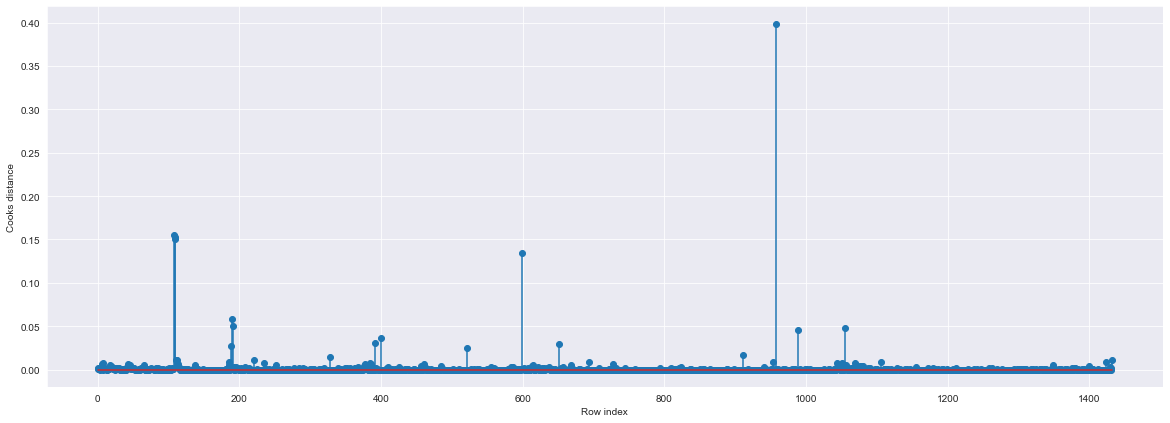

In [72]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df4_new)), np.round(c2,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [73]:
np.argmax(c2), np.max(c2)

(957, 0.3985490851642004)

In [74]:
# leverage cutoff value
leverage_cutoff = 3*((4 + 1)/49)
print('leverage cutoff =',leverage_cutoff)

leverage cutoff = 0.30612244897959184


In [75]:
# deleting 46th record since its cook's distance value is beyond leverage cutoff
df4_new[df4_new.index.isin([108])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
108,1.0,0.240506,0.029572,0.333333,0.020408,0.333333,0.666667,0.25,0.170732


In [76]:
df5_new = df4_new.drop(df4_new.index[[957]],axis=0)

In [77]:
df5_new.shape

(1432, 9)

In [78]:
#Rebuild model and generate R-Squared and AIC values

model5= smf.ols('Price ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data= df5_new).fit()

In [79]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1088.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:42:36   Log-Likelihood:                 1466.6
No. Observations:                1432   AIC:                            -2915.
Df Residuals:                    1423   BIC:                            -2868.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8401      0.028     29.607      0.000       0.784       0.896
Age_08_04        -0.6787      0.014    -48.949      0.000      -0.706      -0.651
KM               -0.2888      0.021    -13.989      0.000      -0.329      -0.248
HP                0.1939      0.024      8.110      0.000       0.147       0.241
cc               -1.4803      0.314     -4.708      0.000      -2.097      -0.864
Doors             0.0122      0.008      1.533      0.125      -0.003       0.028
Gears             0.1198      0.038      3.117      0.002       0.044       0.195
Quarterly_Tax     0.0597      0.026      2.328      0.020       0.009       0.110
Weight            0.5408      0.056      9.628      0.000       0.431       0.651
==============================================================================
Omnibus:                      113.543   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.580
Skew:                          -0.353   Prob(JB):                     1.69e-82
Kurtosis:                       5.411   Cond. No.                         224.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Table containing R^2 value for each prepared model

In [80]:
d2={'Model Name':['Model1','Model2','Model3','Model4','Model5'],'Rsquared':[model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared]}
table=pd.DataFrame(d2)
table

,Model Name,Rsquared
0,Model1,0.855846
1,Model2,0.856529
2,Model3,0.858020
3,Model4,0.858164
4,Model5,0.859495


In [81]:
#Inference : model5 is having highest R-squared value

# Model Predictions

In [82]:
# let the data for prediction is
pred_data=pd.DataFrame({ "Age_08_04":23,"KM":46986,"HP":90,"cc":2000,"Doors":3,"Gears":5,"Quarterly_Tax":210,"Weight":1165},index=[0])

In [83]:
pred_data

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165


In [84]:
# Manual Prediction of Price
model5.predict(pred_data)

0   -15885.680564
dtype: float64